In [83]:
import numpy as np
import pandas as pd
import os 
import tqdm

import seaborn as sns
import matplotlib.pyplot as plt

from Bio.PDB import *
from difflib import SequenceMatcher
import Levenshtein

import ast

In [84]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [85]:
df = pd.read_csv('df.csv')  

In [86]:
df

,Unnamed: 0,Comment,Filename,Header info (y/n),Missing residues,N of missing residues,Residues (dict),Residues (len),SEQRES (dict),SEQRES (len),Seqres matches pdb res_list
0,0,Ok,pdb2mya.ent,False,{},0,"{1: 'VAL', 2: 'LEU', 3: 'SER', 4: 'GLU', 5: 'G...",153.0,"{1: 'VAL', 2: 'LEU', 3: 'SER', 4: 'GLU', 5: 'G...",153.0,True
1,1,Ok,pdb2myb.ent,False,{},0,"{1: 'VAL', 2: 'LEU', 3: 'SER', 4: 'GLU', 5: 'G...",153.0,"{1: 'VAL', 2: 'LEU', 3: 'SER', 4: 'GLU', 5: 'G...",153.0,True
2,2,Ok,pdb2myc.ent,False,{},0,"{1: 'VAL', 2: 'LEU', 3: 'SER', 4: 'GLU', 5: 'G...",153.0,"{1: 'VAL', 2: 'LEU', 3: 'SER', 4: 'GLU', 5: 'G...",153.0,True
3,3,Ok,pdb2myd.ent,False,{},0,"{1: 'VAL', 2: 'LEU', 3: 'SER', 4: 'GLU', 5: 'G...",153.0,"{1: 'VAL', 2: 'LEU', 3: 'SER', 4: 'GLU', 5: 'G...",153.0,True
4,4,Ok,pdb2mye.ent,False,{},0,"{1: 'VAL', 2: 'LEU', 3: 'SER', 4: 'GLU', 5: 'G...",153.0,"{1: 'VAL', 2: 'LEU', 3: 'SER', 4: 'GLU', 5: 'G...",153.0,True
...,...,...,...,...,...,...,...,...,...,...,...
4997,4997,Ok,pdb6q11.ent,True,"{-3: 'GLY', -2: 'GLY', -1: 'GLY', 0: 'MET', 41...",5,"{1: 'MET', 2: 'ALA', 3: 'LYS', 4: 'ILE', 5: 'I...",416.0,"{1: 'GLY', 2: 'GLY', 3: 'GLY', 4: 'MET', 5: 'M...",421.0,True
4998,4998,Ok,pdb6q1c.ent,True,"{1: 'MET', 2: 'ILE', 3: 'GLU', 4: 'ARG', 5: 'L...",52,"{40: 'LYS', 41: 'LYS', 42: 'PHE', 43: 'LYS', 4...",259.0,"{1: 'MET', 2: 'ILE', 3: 'GLU', 4: 'ARG', 5: 'L...",311.0,True
4999,4999,Ok,pdb6q1d.ent,True,"{1: 'MET', 2: 'ILE', 3: 'GLU', 4: 'ARG', 5: 'L...",37,"{38: 'THR', 39: 'ALA', 40: 'LYS', 41: 'LYS', 4...",274.0,"{1: 'MET', 2: 'ILE', 3: 'GLU', 4: 'ARG', 5: 'L...",311.0,True
5000,5000,Ok,pdb6q24.ent,True,"{32: 'MSE', 33: 'HIS', 34: 'HIS', 35: 'HIS', 3...",41,"{73: 'ASN', 74: 'ARG', 75: 'HIS', 76: 'GLN', 7...",208.0,"{1: 'MSE', 2: 'HIS', 3: 'HIS', 4: 'HIS', 5: 'H...",251.0,False


In [121]:
len_array = [len(list(ast.literal_eval(item))) for item in list(df["SEQRES (dict)"])]

500

In [124]:
max_len = max(len_array)

In [131]:
def convert_aa(aa_list, max_L):
    
    flag = True
    aa_converted = []
    
    amino_acids_list = "ALA CYS ASP GLU PHE GLY HIS ILE LYS LEU MET ASN PRO GLN ARG SER THR VAL TRP TYR SEC MSE".split()
    amino_acids_dict = {amino_acids_list[i]: i + 1 for i in range(0, len(amino_acids_list))}
    
    for item in aa_list:
        if item in amino_acids_list:
            aa_converted.append(amino_acids_dict[item])
        else:
            aa_converted = []
            flag = False
            
    if len(aa_converted) < max_L:
        for _ in range (max_L - len(aa_converted)):
            aa_converted.append(0)
   
    #print(len(aa_converted))
    return aa_converted, flag

In [132]:
data = []
count = 0

for data_seqres in list(df["SEQRES (dict)"]):
    aa_, flag = convert_aa(list(ast.literal_eval(data_seqres).values()), max_len)
    if flag: 
        data.append(np.array(aa_))
    else:  
        count +=1

In [133]:
print("N of invalid SEQRES:", count)

N of invalid SEQRES: 306


In [134]:
np.array(data).shape

(4696, 500)

In [101]:
tsne = TSNE(random_state=17)
dbscan = DBSCAN()

In [135]:
X_tsne = tsne.fit_transform(np.array(data))

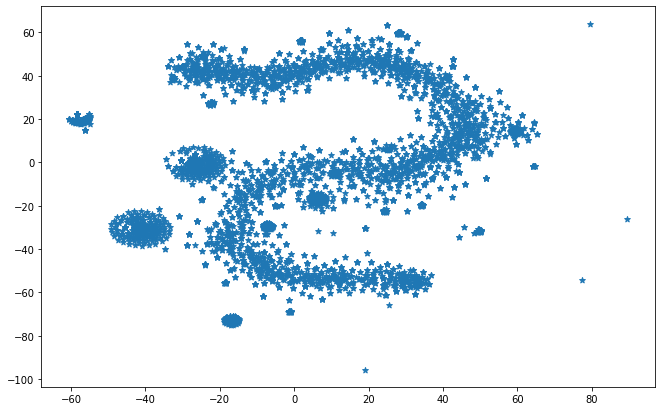

In [147]:
x_axis = X_tsne[:, 0]
y_axis = X_tsne[:, 1]

plt.figure(figsize=(11,7))
plt.scatter(x_axis, y_axis, marker='*' )
plt.show()